# Get Immutable Reference Benchmarks

In [1]:
# select measurement file
file_name = "data/2025-03-13 08-27-11 get.json"

# plot settings
show_error_bar = False
unit = "ms"
plotted_object_sizes = [32, 128, 512, 1024]

In [2]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [3]:
from util.convert import convert_datasets
import pandas as pd

ovpm = convert_datasets(
    raw_data,
    "vNV-Heap",
    [("get_min", "Best-Case"), ("get_min_max", "Bad-Case"), ("get_max", "Worst-Case")],
    ["mean", "min", "max", "options.object_size", "options.blocker_size", "options.blocker_count", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

baseline = convert_datasets(
    raw_data,
    "Module-Based",
    [("baseline_get_min", "Best-Case"), ("baseline_get_min_max", "Bad-Case"), ("baseline_get_max", "Worst-Case")],
    ["mean", "min", "max", "options.object_size", "options.bucket_size", "options.modules", "machine_name", "cold_start", "repetitions"],
    unwrapped=show_error_bar
)

dataset = pd.concat([ovpm, baseline])
dataset.head()

[{'mean': 1040.8, 'min': 1040, 'max': 1041, 'options.object_size': 8, 'options.modules': {'allocator': 'vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule', 'non_resident_allocator': 'vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>'}, 'options.modules.allocator': 'vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule', 'options.modules.non_resident_allocator': 'vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>', 'bench_name': 'get_min', 'machine_name': 'esp32c3', 'cold_start': 0, 'repetitions': 100, 'ticks_per_ms': 16000}, {'mean': 914.59, 'min': 914, 'max': 915, 'options.object_size': 16, 'options.modules': {'allocator': 'vnv_heap::modules::allocator::linked_list::LinkedListAllocatorModule', 'non_resident_allocator': 'vnv_heap::modules::nonresident_allocator::buddy::NonResidentBuddyAllocatorModule<19>'}, 'options.modules.allocator': 'vnv_heap::modules::allocator::linked_list::Linke

,mean,min,max,options.object_size,options.blocker_size,options.blocker_count,options.modules,machine_name,cold_start,repetitions,ticks_per_ms,dataset_type,benchmark_title,benchmark_id,options.bucket_size
0,1040.80,1040,1041,8,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,100,16000,vNV-Heap,Best-Case,get_min,NaN
1,914.59,914,915,16,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,100,16000,vNV-Heap,Best-Case,get_min,NaN
2,914.24,914,915,32,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,100,16000,vNV-Heap,Best-Case,get_min,NaN
3,915.41,915,916,48,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,100,16000,vNV-Heap,Best-Case,get_min,NaN
4,979.19,978,980,64,NaN,NaN,{'allocator': 'vnv_heap::modules::allocator::l...,esp32c3,0,100,16000,vNV-Heap,Best-Case,get_min,NaN


## Display Min and Max Latencies

In [4]:
from util.convert import display_dataset_infos

display_dataset_infos(dataset)

min    37.341875
max    65.089375
Name: mean, dtype: float64

min      576.16375
max    12358.18750
Name: mean, dtype: float64

min    20646.141250
max    32621.626875
Name: mean, dtype: float64

## Compare the latencies

In [5]:
from util.convert import scale_and_filter_data
from IPython.display import HTML, display
import numpy as np

filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)

for title in filtered["benchmark_title"].unique():
    display(HTML(f"<b>{title}</b>"))
        
    tmp = filtered[filtered["benchmark_title"] == title]
    assert(len(tmp["benchmark_id"].unique()) == 2)
    [left, right] = tmp["benchmark_id"].unique()

    res = []
    for size in tmp["options.object_size"].unique():
        rows = tmp[(tmp["options.object_size"] == size)]
        a = rows[rows["benchmark_id"] == left]["mean"].iloc[0]
        b = rows[rows["benchmark_id"] == right]["mean"].iloc[0]
        res.append((size, a,b,(100 * a)/b - 100, (100 * b)/a - 100))

    d = pd.DataFrame(res, columns=["Object size", f"{left} [{unit}]", f"{right} [{unit}]", "% Worse", "% Better"])

    display(d)
    print("Stats:")
    display(d.describe())

,Object size,get_min [ms],baseline_get_min [ms],% Worse,% Better
0,32,0.057140,0.037344,53.010879,-34.645170
1,128,0.053186,0.037349,42.404364,-29.777433
2,512,0.057125,0.037348,52.952792,-34.620350
3,1024,0.057134,0.037348,52.977894,-34.631078


Stats:


,Object size,get_min [ms],baseline_get_min [ms],% Worse,% Better
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,424.000000,0.056146,0.037347,50.336482,-33.418508
std,450.564091,0.001973,0.000002,5.288132,2.427404
min,32.000000,0.053186,0.037344,42.404364,-34.645170
25%,104.000000,0.056140,0.037347,50.315685,-34.634601
50%,320.000000,0.057130,0.037348,52.965343,-34.625714
75%,640.000000,0.057136,0.037348,52.986140,-33.409621
max,1024.000000,0.057140,0.037349,53.010879,-29.777433


,Object size,get_min_max [ms],baseline_get_min_max [ms],% Worse,% Better
0,32,0.844909,12.358187,-93.163161,1362.664265
1,128,1.953653,12.358187,-84.191427,532.568154
2,512,6.385900,12.358187,-48.326565,93.523035
3,1024,12.293270,12.358152,-0.525013,0.527784


Stats:


,Object size,get_min_max [ms],baseline_get_min_max [ms],% Worse,% Better
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,424.000000,5.369433,12.358179,-56.551541,497.320809
std,450.564091,5.199730,0.000018,42.075314,621.803191
min,32.000000,0.844909,12.358152,-93.163161,0.527784
25%,104.000000,1.676467,12.358179,-86.434360,70.274222
50%,320.000000,4.169777,12.358187,-66.258996,313.045594
75%,640.000000,7.862742,12.358187,-36.376177,740.092181
max,1024.000000,12.293270,12.358187,-0.525013,1362.664265


,Object size,get_max [ms],baseline_get_max [ms],% Worse,% Better
0,32,20.931227,32.621563,-35.836223,55.851175
1,128,22.038875,32.621587,-32.440825,48.018385
2,512,26.460687,32.621563,-18.885898,23.283125
3,1024,32.373938,32.621584,-0.759147,0.764954


Stats:


,Object size,get_max [ms],baseline_get_max [ms],% Worse,% Better
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,424.000000,25.451182,32.621574,-21.980523,31.979410
std,450.564091,5.196713,0.000013,15.930284,25.013847
min,32.000000,20.931227,32.621563,-35.836223,0.764954
25%,104.000000,21.761963,32.621563,-33.289675,17.653582
50%,320.000000,24.249781,32.621573,-25.663361,35.650755
75%,640.000000,27.939000,32.621585,-14.354210,49.976583
max,1024.000000,32.373938,32.621587,-0.759147,55.851175


# Final Plot

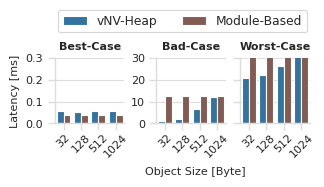

In [6]:
from util.plot import set_theme, plot_colors, save_plot
from util.convert import scale_and_filter_data
import seaborn as sns
import matplotlib.pyplot as plt

palette = set_theme(colors=2)
# palette = [palette[1], palette[0]]
palette = [sns.color_palette("tab10")[0], sns.color_palette("tab10")[5]]
# palette = ["#51c56a", "#433e85"]
# palette = [sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[3]]
sns.set_palette(palette=palette)

unit = "ms"
filtered = scale_and_filter_data(dataset, unit, plotted_object_sizes)


g = sns.catplot(
    data=filtered,
    kind="bar",
    x="options.object_size", y="mean", hue="dataset_type", col="benchmark_title",
    col_wrap=4,
    errorbar="sd", alpha=1, aspect=(1/1.6)*(3.3/3) - (1/3) * 0.05 + 0.03, height=1.6, width=0.8,
    sharey=False
)
g.set_titles("{col_name}")
g.set(xlabel=None, ylabel='Latency [ms]')
g.tight_layout(pad=0)
g.legend.set_title("\nMeasurement")
#plt.yscale('log')

# def format_float(value, pos):
#     if value == int(value) and value != 1:
#         return str(int(value))
#     else:
#         return str(value)

for ax in g.axes:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, y=0.05, ha="center")
    ax.set_title(ax.get_title(), rotation = 0, fontweight="bold")
    #ax.yaxis.set_major_formatter(FuncFormatter(format_float))

g.axes[1].set_ylabel("")
g.axes[2].set_ylabel("")
g.axes[0].set_ylim(top=(filtered["mean"].max() * 1.05)/100)

# g.axes[1].sharey(g.axes[2])
# y.set_xmargin(10)

g.axes[0].set_yticks([0,0.1,0.2,0.3])
g.axes[0].set_ylim(top=.3)
g.axes[1].set_yticks([0,10,20,30])
g.axes[1].set_ylim(top=30)
g.axes[2].set_yticks([0,10,20,30])
g.axes[2].set_yticklabels([])
g.axes[2].set_ylim(top=30)

#axins = zoomed_inset_axes(g.axes[0], 2, loc=1) # zoom = 6
g.figure.supxlabel("Object Size [Byte]", x=0.34, y=0.08, fontsize=8)
g.tight_layout(w_pad=0, h_pad=0)
catplot_handles = g.legend.set(visible=False)

box = g.axes[2].get_position()
box.x0 = box.x0 + -0.03
box.x1 = box.x1 + -0.03
g.axes[2].set_position(box)


plt.legend(
    loc = "lower center",
    bbox_to_anchor=(-0.83, 1.3),
    ncol=2,
    title=None,
    frameon=True
)

save_plot("accessing_data", False)